In [588]:
import pandas as pd
import numpy as np
import datetime

In [661]:
data = pd.read_csv('predicted_data_custom.csv')
data = data.drop('Unnamed: 0', 1)
data = data.drop('index', 1)
#data.set_index(['GAME_DATE', 'HOME', 'AWAY'])


In [662]:
data['odds1_true'] = 1/ pd.to_numeric(data['Odds1'],errors='coerce')
data['odds2_true'] = 1/ pd.to_numeric(data['Odds2'], errors='coerce')
data['odds_total'] = data['odds1_true'] + data['odds2_true']
data['pred_away'] = 1 - pd.to_numeric(data['prediction'], errors='coerce')
data.rename(columns={'prediction': 'pred_home'}, inplace=True)
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

data

,Results,GAME_DATE,HOME,AWAY,Odds1,Odds2,Score,pred_home,odds1_true,odds2_true,odds_total,pred_away
0,1.0,2020-08-02,MIN,LAC,5.12,1.19,142:115,0.232488,0.195312,0.840336,1.035649,0.767512
1,0.0,2013-11-22,DET,ATL,1.59,2.46,89:96,0.435738,0.628931,0.406504,1.035435,0.564262
2,1.0,2013-03-29,MIN,OKC,4.08,1.26,101:93,0.335608,0.245098,0.793651,1.038749,0.664392
3,0.0,2016-05-01,LAL,GSW,12.44,1.05,88:109,0.298686,0.080386,0.952381,1.032767,0.701314
4,0.0,2014-05-04,WAS,CHI,1.74,2.14,78:96,0.507790,0.574713,0.467290,1.042002,0.492210
...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.0,2019-07-02,BOS,LAL,1.24,4.33,128:129,0.753484,0.806452,0.230947,1.037398,0.246516
2856,1.0,2020-08-02,TOR,BKN,1.39,3.15,119:118,0.697533,0.719424,0.317460,1.036885,0.302467
2857,0.0,2019-03-21,WAS,DEN,4.11,1.26,108:113,0.477435,0.243309,0.793651,1.036960,0.522565
2858,1.0,2010-12-03,MIA,CHI,1.11,7.29,108:95,0.597489,0.900901,0.137174,1.038075,0.402511


In [663]:
cols = list(data.columns.values)
cols

['Results',
 'GAME_DATE',
 'HOME',
 'AWAY',
 'Odds1',
 'Odds2',
 'Score',
 'pred_home',
 'odds1_true',
 'odds2_true',
 'odds_total',
 'pred_away']

In [664]:
data = data[[
 'GAME_DATE',
 'HOME',
 'AWAY','Score',
 'Odds1',
 'Odds2',
 'odds_total',
 'odds1_true',
 'odds2_true',
 'pred_home',
 'pred_away',
    'Results']]

data.sort_values(by='GAME_DATE', inplace=True)
#data.set_index(['GAME_DATE', 'HOME', 'AWAY'], inplace=True)
data

,GAME_DATE,HOME,AWAY,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results
1751,2008-01-12,CHA,MIN,100:90,1.60,2.35,1.050532,0.625000,0.425532,0.507790,0.492210,1.0
2567,2008-03-12,PHI,LAL,102:114,4.70,1.19,1.053102,0.212766,0.840336,0.350289,0.649711,0.0
358,2008-03-12,UTA,MIA,89:93,1.46,2.72,1.052579,0.684932,0.367647,0.670608,0.329392,0.0
93,2008-03-12,WAS,POR,92:98,3.27,1.34,1.052079,0.305810,0.746269,0.387906,0.612094,0.0
1786,2008-05-12,ATL,NYK,98:95,1.12,5.70,1.068296,0.892857,0.175439,0.732180,0.267820,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1676,2022-12-01,ATL,MIA,91:115,1.72,2.20,1.035941,0.581395,0.454545,0.442231,0.557769,0.0
940,2022-12-01,SAS,HOU,124:128,1.33,3.48,1.039236,0.751880,0.287356,0.706589,0.293411,0.0
1206,2022-12-02,PHI,CLE,103:93,1.69,2.24,1.038145,0.591716,0.446429,0.549105,0.450895,1.0
590,2022-12-03,MIA,MIN,104:113,1.62,2.38,1.037452,0.617284,0.420168,0.452404,0.547596,0.0


In [665]:
data.tail(20)

,GAME_DATE,HOME,AWAY,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results
1251,2022-10-01,HOU,PHI,91:111,4.81,1.21,1.034346,0.207900,0.826446,0.303608,0.696392,0.0
945,2022-10-01,NYK,SAS,111:96,1.41,3.05,1.037089,0.709220,0.327869,0.558421,0.441579,1.0
862,2022-10-01,SAC,CLE,108:109,2.74,1.48,1.040639,0.364964,0.675676,0.305654,0.694346,0.0
2409,2022-10-02,HOU,TOR,120:139,3.47,1.33,1.040064,0.288184,0.751880,0.278029,0.721971,0.0
1249,2022-10-04,CHA,WAS,124:108,1.12,6.75,1.041005,0.892857,0.148148,0.614294,0.385706,1.0
243,2022-10-04,PHX,SAC,109:116,1.19,5.16,1.034135,0.840336,0.193798,0.667077,0.332923,0.0
822,2022-10-04,CLE,MIL,133:115,1.26,4.12,1.036369,0.793651,0.242718,0.348057,0.651943,1.0
776,2022-10-04,BKN,IND,134:126,1.05,11.67,1.038071,0.952381,0.085690,0.695038,0.304962,1.0
86,2022-10-04,MEM,BOS,110:139,4.11,1.26,1.036960,0.243309,0.793651,0.413494,0.586506,0.0
1573,2022-10-04,LAC,OKC,138:88,1.14,6.14,1.040059,0.877193,0.162866,0.609591,0.390409,1.0


In [666]:
percentile = [0.6, 0.7,0.8, 0.9]
for i in percentile:
    print(data.pred_home.quantile(i))

    #print(data.pred_away.quantile(i))
data.pred_home.mean()

0.6128368139266968
0.651482105255127
0.6922378063201905
0.7401564180850982


0.5561531307918208

array([[<AxesSubplot:title={'center':'pred_away'}>]], dtype=object)

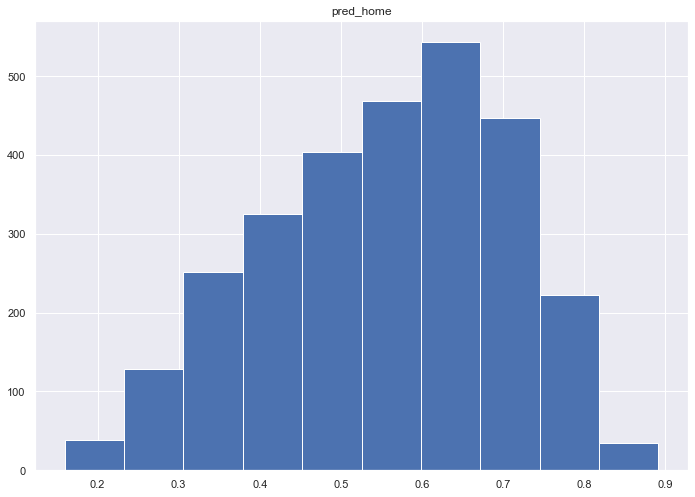

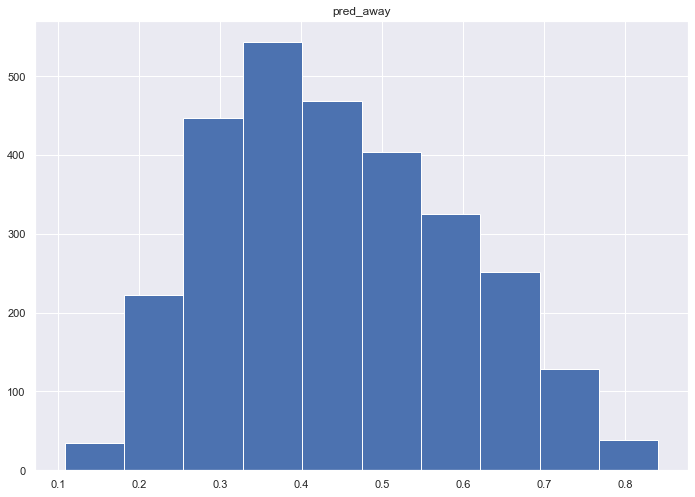

In [667]:
data.hist(column='pred_home')
data.hist(column='pred_away')

In [668]:
data[['odds1_true', 'odds2_true']].astype(float)
data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02
data['diff_pred_odds_h'] = data['pred_home'] - data['odds1_true']
data['diff_pred_odds_a'] = data['pred_away'] - data['odds2_true']


In [669]:
def roi1h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['diff_pred_odds_h'] >= 0.10:
            return None
        elif df['pred_home'] >= 0.55 and df['pred_home'] <0.6:
            return df['Results'] * df['Odds1'] * 1 -1
        
def roi2h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['diff_pred_odds_h'] >= 0.10:
            return None
        elif df['pred_home']> 0.6 and df['pred_home'] <=0.7:
            return df['Results'] * df['Odds1'] * 2 - 2
        
def roi3h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['diff_pred_odds_h'] >= 0.10:
            return None
        elif df['pred_home']> 0.7 and df['pred_home'] <=0.9:
            return df['Results'] * df['Odds1'] * 3 - 3
        
def roi1a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['diff_pred_odds_a'] >= 0.10:
            return None
        elif df['pred_away']>= 0.55 and df['pred_away'] <0.6:
            return (1- df['Results']) * df['Odds2'] * 1 -1
        
def roi2a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['diff_pred_odds_a'] >= 0.10:
            return None
        elif df['pred_away']> 0.6 and df['pred_away'] <=0.7:
            return (1 - df['Results']) * df['Odds2'] * 2 -2
        
def roi3a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['diff_pred_odds_a'] >= 0.10:
            return None
        elif df['pred_away']> 0.7 and df['pred_away'] <=0.9:
            return (1 - df['Results']) * df['Odds2'] * 3 -3
     

data.sort_values(by='GAME_DATE', inplace=True)
data['roi1h'] = data.apply(roi1h, axis=1)
data['roi2h'] = data.apply(roi2h, axis=1)
data['roi3h'] = data.apply(roi3h, axis=1)
data['roi1a'] = data.apply(roi1a, axis=1)
data['roi2a'] = data.apply(roi2a, axis=1)
data['roi3a'] = data.apply(roi3a, axis=1)
data['roi_total'] = data.fillna(0)['roi1h'] + data.fillna(0)['roi2h'] + data.fillna(0)['roi3h'] + data.fillna(0)['roi1a'] + data.fillna(0)['roi2a'] + data.fillna(0)['roi3a']
data['roi_total_cum'] = data['roi_total'].cumsum()
data

,GAME_DATE,HOME,AWAY,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,...,diff_pred_odds_h,diff_pred_odds_a,roi1h,roi2h,roi3h,roi1a,roi2a,roi3a,roi_total,roi_total_cum
1751,2008-01-12,CHA,MIN,100:90,1.60,2.35,1.050532,0.625000,0.425532,0.507790,...,-0.117210,0.066678,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
2567,2008-03-12,PHI,LAL,102:114,4.70,1.19,1.053102,0.212766,0.840336,0.350289,...,0.137523,-0.190625,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
358,2008-03-12,UTA,MIA,89:93,1.46,2.72,1.052579,0.684932,0.367647,0.670608,...,-0.014324,-0.038255,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
93,2008-03-12,WAS,POR,92:98,3.27,1.34,1.052079,0.305810,0.746269,0.387906,...,0.082095,-0.134175,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
1786,2008-05-12,ATL,NYK,98:95,1.12,5.70,1.068296,0.892857,0.175439,0.732180,...,-0.160677,0.092381,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022-12-01,SAS,HOU,124:128,1.33,3.48,1.039236,0.751880,0.287356,0.706589,...,-0.045291,0.006055,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-7.18
615,2022-12-01,PHI,CHA,98:109,1.48,2.76,1.037995,0.675676,0.362319,0.687868,...,0.012192,-0.050187,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-7.18
1206,2022-12-02,PHI,CLE,103:93,1.69,2.24,1.038145,0.591716,0.446429,0.549105,...,-0.042611,0.004467,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-7.18
590,2022-12-03,MIA,MIN,104:113,1.62,2.38,1.037452,0.617284,0.420168,0.452404,...,-0.164880,0.127428,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-7.18


In [670]:
data.reset_index(inplace=True)
data['roi_total'] = data['roi_total'].replace(0, np.nan)
data['roi_total_cum'] = data['roi_total'].cumsum()
data['roi1h_cum'] = data['roi1h'].cumsum()
data['roi2h_cum'] = data['roi2h'].cumsum()
data['roi3h_cum'] = data['roi3h'].cumsum()
data['roi1a_cum'] = data['roi1a'].cumsum()
data['roi2a_cum'] = data['roi2a'].cumsum()
data['roi3a_cum'] = data['roi3a'].cumsum()
data_roi = data[['roi1h_cum','roi2h_cum','roi3h_cum','roi1a_cum','roi2a_cum','roi3a_cum','roi_total_cum','GAME_DATE']]
#data = data.sort_values(by='GAME_DATE')

In [671]:
#data.to_datetime('GAME_DATE')
#data_roi.sort_values(by='GAME_DATE', inplace=True)
data_roi.set_index('GAME_DATE', inplace=True)
data_roi


,roi1h_cum,roi2h_cum,roi3h_cum,roi1a_cum,roi2a_cum,roi3a_cum,roi_total_cum
GAME_DATE,,,,,,,
2008-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='GAME_DATE'>

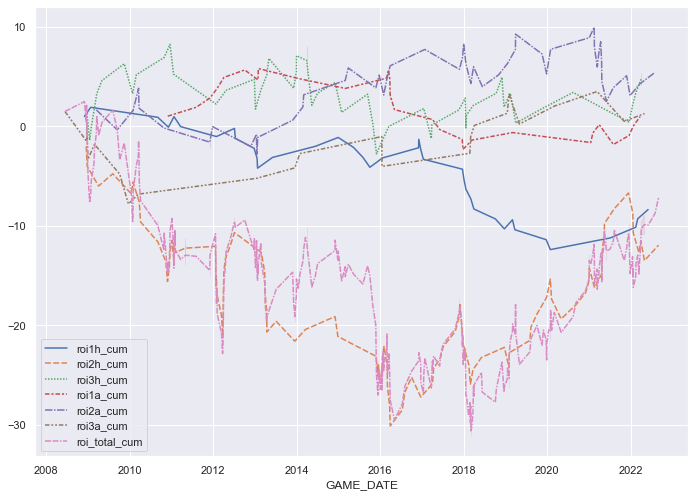

In [672]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = data_roi )

In [475]:
data_roi.count()

roi1h_cum         34
roi2h_cum        130
roi3h_cum        184
roi1a_cum         19
roi2a_cum         53
roi3a_cum         17
roi_total_cum    437
dtype: int64

In [550]:
data.to_csv(r'data_predictions\pred_stats_030.csv')